<a href="https://colab.research.google.com/github/beratcmn/clothing_classification/blob/main/clothing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

### Importing the libraries.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


### Importing the Fashion MNIST dataset

https://www.tensorflow.org/tutorials/keras/classification#import_the_fashion_mnist_dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label	Class
* 0 =	T-shirt/top
* 1 =	Trouser
* 2 =	Pullover
* 3 =	Dress
* 4 =	Coat
* 5 =	Sandal
* 6 =	Shirt
* 7 =	Sneaker
* 8 =	Bag
* 9 =	Ankle boot

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Understanding the data

In [5]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels, len(train_labels)

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), 60000)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels, len(test_labels)

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), 10000)

### Preprocessing the data

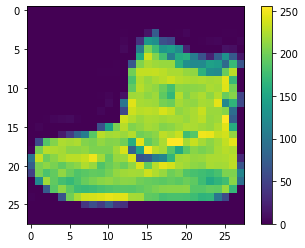

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
# Normalizing the data
train_images = train_images / 255.0

test_images = test_images / 255.0

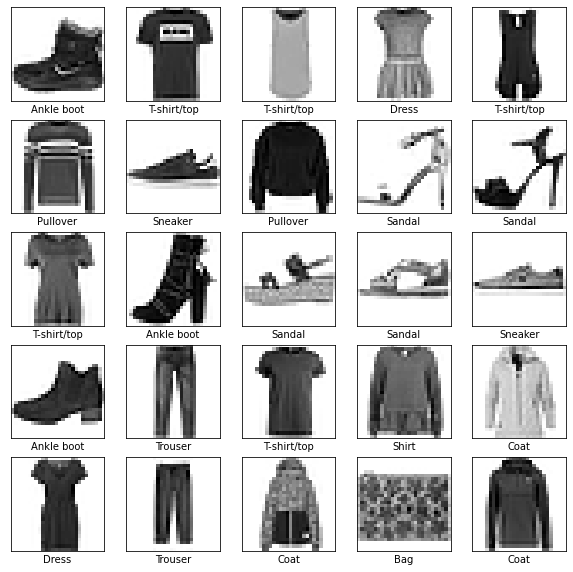

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building the model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compiling the model

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

https://www.tensorflow.org/tutorials/keras/classification#train_the_model

In [31]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1448 - accuracy: 0.9454
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1412 - accuracy: 0.9463
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1371 - accuracy: 0.9476
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9480
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9495
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1302 - accuracy: 0.9507
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1286 - accuracy: 0.9510
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1274 - accuracy: 0.9521
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9542
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.120

### Evaluating Accuracy

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.6456 - accuracy: 0.8890 - 772ms/epoch - 2ms/step


### Making predictions

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [35]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [36]:
predictions

array([[3.51723917e-20, 1.54119298e-21, 9.91618742e-26, ...,
        1.14156123e-07, 2.56822649e-20, 9.99999881e-01],
       [9.28713998e-05, 0.00000000e+00, 9.99880075e-01, ...,
        1.20606355e-36, 6.27559575e-22, 6.40307975e-38],
       [1.02109206e-25, 1.00000000e+00, 2.74684310e-30, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.45516321e-21, 0.00000000e+00, 8.13803898e-24, ...,
        1.34855430e-32, 1.00000000e+00, 3.90193301e-32],
       [2.28490270e-32, 1.00000000e+00, 1.47481635e-32, ...,
        0.00000000e+00, 3.12555424e-35, 0.00000000e+00],
       [1.64570840e-11, 2.37700818e-19, 1.36228504e-20, ...,
        1.61072856e-11, 2.20679822e-10, 5.34879879e-23]], dtype=float32)

In [37]:
predictions[0]

array([3.51723917e-20, 1.54119298e-21, 9.91618742e-26, 8.61101772e-36,
       1.33117425e-20, 6.43436682e-09, 1.60723922e-22, 1.14156123e-07,
       2.56822649e-20, 9.99999881e-01], dtype=float32)

In [39]:
np.argmax(predictions[0]), test_labels[0]

(9, 9)

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verifying predictions

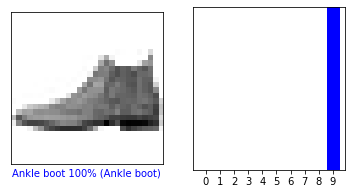

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

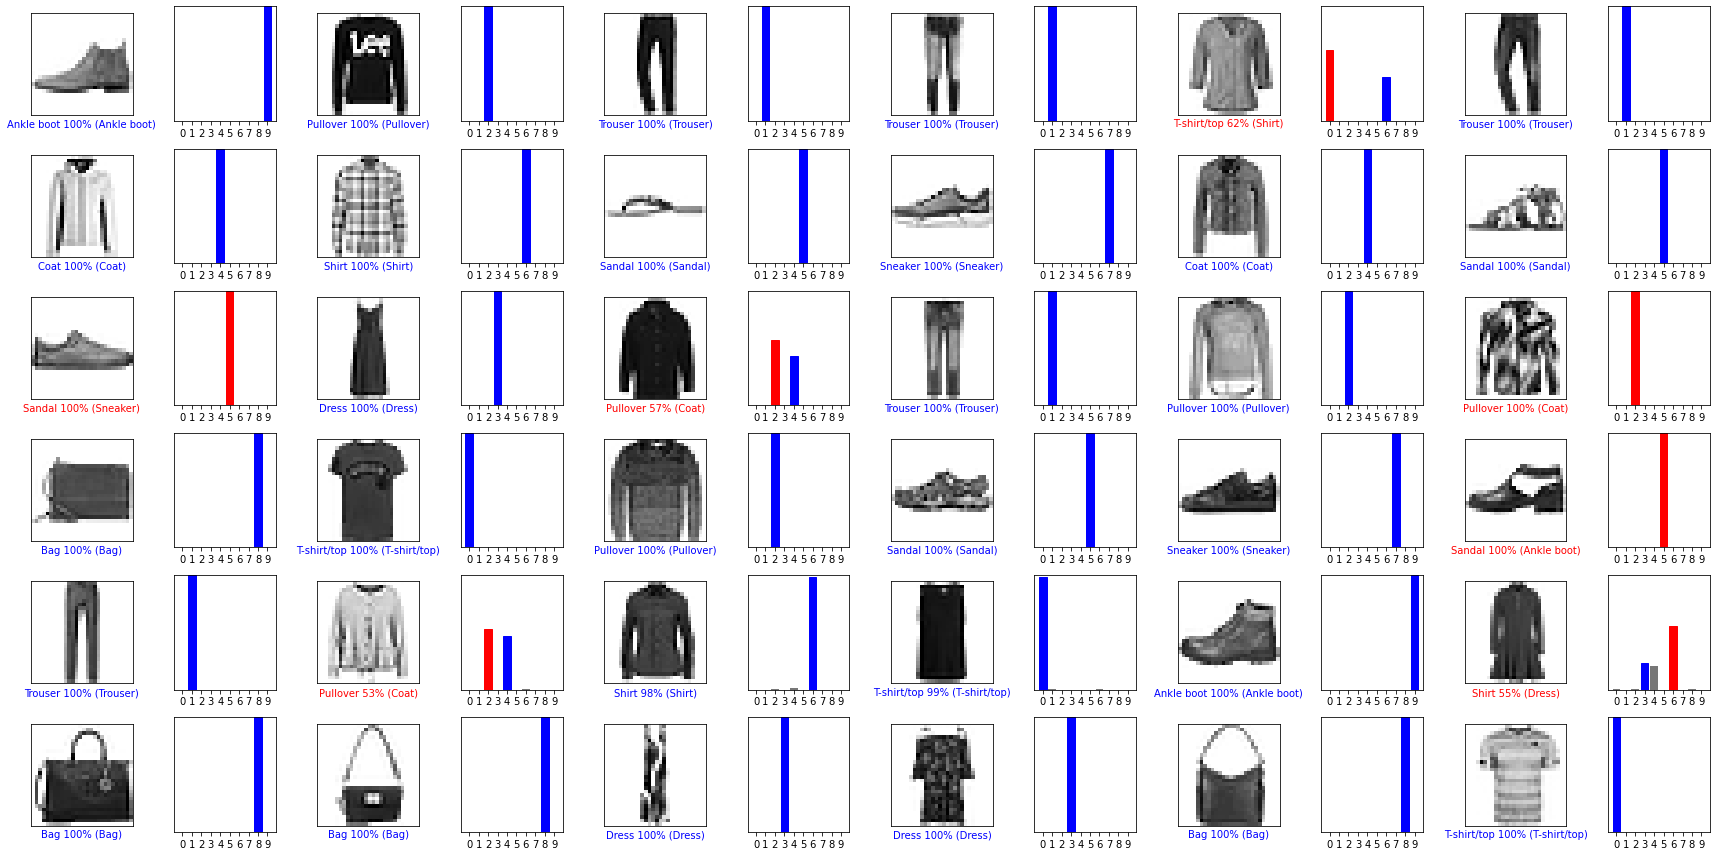

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 6
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Using the model

https://www.tensorflow.org/tutorials/keras/classification#use_the_trained_model

In [53]:
# Getting an image from the test dataset
img = test_images[1]

img.shape

(28, 28)

In [54]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [55]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[9.2871400e-05 0.0000000e+00 9.9988008e-01 1.7419374e-24 2.6809887e-05
  2.7551730e-21 2.6305128e-07 1.2060451e-36 6.2755483e-22 6.4030798e-38]]


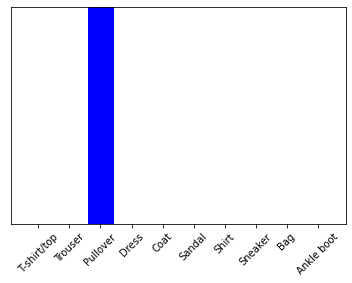

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [57]:
np.argmax(predictions_single[0])

2